# Market Basket Analysis on the Groceries Data

* Importing the Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
import re


* Importing the Dataset

In [42]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

# Data Analysis

In [43]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [44]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


* Getting Basic Information

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


* Getting the Shape of the df

In [46]:
df.shape

(38765, 3)

No NaN values

* Checking the size of the df

In [47]:
df.size

116295

* Checking for the NaN values

In [48]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

* Top 10 Selling Item

In [49]:
df.itemDescription.value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

* Plotting the Top 10 Selling Items

<AxesSubplot:>

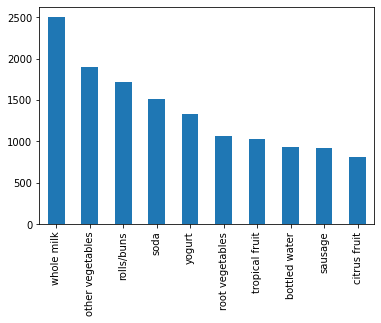

In [50]:
df.itemDescription.value_counts().head(10).plot.bar()

* Least 10 Selling Item

In [51]:
df.itemDescription.value_counts().tail(10)

whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: itemDescription, dtype: int64

<AxesSubplot:>

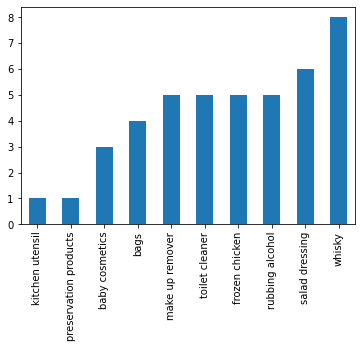

In [52]:
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()

* Top 10 Customers

In [53]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [54]:
df.Member_number.value_counts().head(10)

3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: Member_number, dtype: int64

<AxesSubplot:>

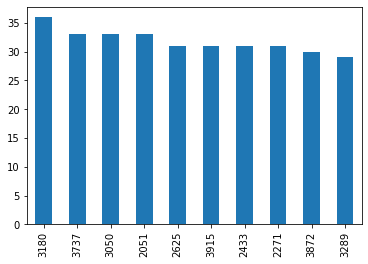

In [55]:
df.Member_number.value_counts().head(10).plot.bar()

* Segregating the Date, Month & Year

In [56]:
# df['Day']=pd.DatetimeIndex(df['Date']).day
# df['Month']=pd.DatetimeIndex(df['Date']).month
# df['year']=pd.DatetimeIndex(df['Date']).year

It is mismatching the Month and the Day

In [57]:
df.head(1)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit


In [58]:
df.Date[0]

'21-07-2015'

In [66]:
clean_day=re.sub('-.*',"",df.Date[0])
clean_day

'21'

In [70]:
clean_month=re.sub('^\d{2}-|-\d{4}','',df.Date[0])
clean_month

'07'

In [80]:
clean_year=re.findall('\d{4}',df.Date[0])
clean_year[0]

'2015'

In [75]:
df['Day']=0
df['Month']=0
df['Year']=0

In [85]:
for i in range(len(df.Date)):
    df['Day'][i]=re.sub('-.*',"",df.Date[i])
    df['Month'][i]=re.sub('^\d{2}-|-\d{4}','',df.Date[i])
    a=re.findall('\d{4}',df.Date[i])
    df['Year'][i]=a[0]
    

In [86]:
df.head()

,Member_number,Date,itemDescription,Day,Month,Year
0,1808,21-07-2015,tropical fruit,21,07,2015
1,2552,05-01-2015,whole milk,05,01,2015
2,2300,19-09-2015,pip fruit,19,09,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,01,02,2015


* In Which year the majority of the Transactions happened

In [88]:
df.Year.value_counts().head(1)

2015    20488
Name: Year, dtype: int64